In [1]:
import sys
sys.path.append("/home/huaqingj/MyResearch/TVDN")

In [2]:
from pyTVDN import TVDNDetect, TVDNRankTuning
from pathlib import Path
from scipy.io import loadmat
from scipy.signal import detrend
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.signal import lfilter, firls, decimate
from tqdm import tqdm_notebook as tqdm
from easydict import EasyDict as edict
from collections import Counter
import pickle

In [3]:
resDir = Path("../results")
dataDir = Path("../data")

filname = Path("fMRI_samples.mat")
fMRIs = loadmat(dataDir/filname)["clean_subjects"]

In [4]:
fs = 0.5 #sampling frequency
fmin = 0.009 # 
fmax = 0.08
hbp = firls(21, np.array([0, 0.009, 0.01, 0.08, 0.09, 0.8]), #0.8
           desired = np.array([0, 0, 1, 1, 0, 0]))

num = fMRIs.shape[-1]
fMRIsHPF = []
for i in range(num):
    cfMRI = fMRIs[0, i]["fMRI"][:90, :]
    # detrend
    cfMRI = detrend(cfMRI)
    chpffMRI = lfilter(hbp, 1, cfMRI)
    fMRIsHPF.append(chpffMRI[:, 25:])

### First method

In [5]:
#Lmin = 4
#lamb = 8e-5
#kappas = np.arange(1, 4, 0.01)
#ranks = [2, 4, 6, 8, 10, 12]
#
#cErr = np.inf
#cOptKappa = None
#ResObjs = None
#cOptRank = None
#for cRank in ranks:
#    numChgsAll = []
#    DetObjs = []
#    for ii in tqdm(range(243)):
#        Ymat = fMRIsHPF[ii]
#        DetRec = TVDNDetect(Ymat=Ymat, dataType="fMRI", MaxM=20, is_detrend=False,
#                          saveDir=None, showProgress=False, Lmin=Lmin, lamb=lamb, kappa=2, r=cRank)
#        DetRec()
#        DetRec.TuningKappa(kappas)
#        
#        DetObjs.append(DetRec)
#        numChgsAll.append(DetRec.numchgs)
#        
#    numChgsArr = np.array(numChgsAll)
#    idx = np.argmin(np.sum((numChgsArr - 5)**2, axis=0))
#    optKa = kappas[idx]
#    
#    # Update det obj
#    errs = []
#    for DetObj in DetObjs:
#        DetObj.UpdateEcpts(DetObj.numchgs[kappas==optKa][0])
#        errs.append(DetObj.GetCurMSE())
#    err = np.mean(errs)
#    print(f"The current error of rank {cRank} is {err:.3f}, and kappa is {optKa:.3f}.")
#    if cErr > err:
#        ResObjs = DetObjs
#        cErr = err
#        cOptKappa = optKa
#        cOptRank = cRank
#        
#result = edict()
#result.DetObjs = ResObjs
#result.Err = cErr
#result.rank = cOptRank
#result.kappa = cOptKappa

#with open(saveDir/"fMRIResultFixnchg5.pkl", "wb") as f:
#    pickle.dump(result, f)
with open(saveDir/"fMRIResultFixnchg5.pkl", "rb") as f:
    result = pickle.load(f)

NameError: name 'saveDir' is not defined

### Second method 

In [41]:
#Lmin = 4
#lamb = 8e-5
#kappas = np.arange(1, 4, 0.01)
#ranks = [2, 4, 6, 8, 10, 12]
#
#cErr = np.inf
#cOptKappa = None
#ResObjs = None
#cOptRank = None
#for cRank in ranks:
#    numChgsAll = []
#    DetObjs = []
#    for ii in tqdm(range(243)):
#        Ymat = fMRIsHPF[ii]
#        DetRec = TVDNDetect(Ymat=Ymat, dataType="fMRI", MaxM=20, is_detrend=False,
#                          saveDir=None, showProgress=False, Lmin=Lmin, lamb=lamb, kappa=2, r=cRank)
#        DetRec()
#        DetRec.TuningKappa(kappas)
#        
#        DetObjs.append(DetRec)
#        numChgsAll.append(DetRec.numchgs)
#        
#    numChgsArr = np.array(numChgsAll)
#    meanChgs = numChgsArr.mean(axis=0)
#    varChgs = numChgsArr.var(axis=0)
#    subVarChgs = varChgs[np.logical_and(meanChgs<=6, meanChgs>=4)]
#    subKappas = kappas[np.logical_and(meanChgs<=6, meanChgs>=4)]
#    optKa = subKappas[np.argmin(subVarChgs)]
#    
#    # Update det obj
#    errs = []
#    for DetObj in DetObjs:
#        DetObj.UpdateEcpts(DetObj.numchgs[kappas==optKa][0])
#        errs.append(DetObj.GetCurMSE())
#        
#    err = np.mean(errs)
#    print(f"The current error of rank {cRank} is {err:.3f}, and kappa is {optKa:.3f}.")
#    
#    cResult = edict()
#    cResult.DetObjs = DetObjs 
#    cResult.Err = err
#    cResult.rank = cRank
#    cResult.kappa = optKa
#    with open(saveDir/f"fMRIResultMinVar_rank{cRank}.pkl", "wb") as f:
#        pickle.dump(cResult, f)
#        
#    if cErr > err:
#        ResObjs = DetObjs
#        cErr = err
#        cOptKappa = optKa
#        cOptRank = cRank
#        
#result = edict()
#result.DetObjs = ResObjs
#result.Err = cErr
#result.rank = cOptRank
#result.kappa = cOptKappa

#with open(saveDir/"fMRIResultMinVar.pkl", "wb") as f:
#    pickle.dump(result, f)
    
with open(saveDir/"fMRIResultMinVar.pkl", "rb") as f:
    result2 = pickle.load(f)

### Results

Text(0, 0.5, 'Percentage')

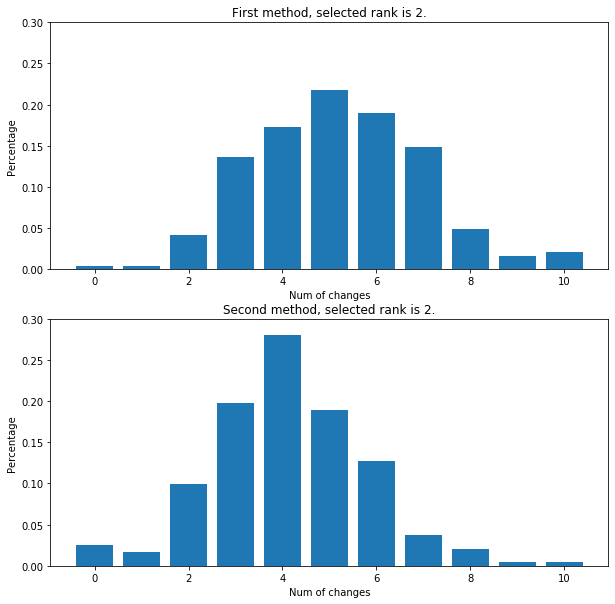

In [48]:
numChgs = []
for resObj in result.DetObjs:
    numChgs.append(len(resObj.ecpts))
numChgsCT = Counter(numChgs)

keys = sorted(list(numChgsCT.keys()))
numChgsList = [numChgsCT[key] for key in keys]

plt.figure(figsize=[10, 10])

plt.subplot(211)
plt.bar(keys, np.array(numChgsList)/243)
plt.ylim([0, 0.3])
plt.title("First method, selected rank is 2.")
plt.xlabel("Num of changes")
plt.ylabel("Percentage")

numChgs = []
for resObj in result2.DetObjs:
    numChgs.append(len(resObj.ecpts))
numChgsCT = Counter(numChgs)

keys = sorted(list(numChgsCT.keys()))
numChgsList = [numChgsCT[key] for key in keys]

plt.subplot(212)
plt.bar(keys, np.array(numChgsList)/243)
plt.title("Second method, selected rank is 2.")
plt.ylim([0, 0.3])
plt.xlabel("Num of changes")
plt.ylabel("Percentage")

### Change the rank range

In [14]:
saveDir = resDir/"fMRIHPFs_rankAdap"
if not saveDir.exists():
    saveDir.mkdir()

datDir = resDir/"fMRIHPFs_fixnchg5"

[PosixPath('../results/fMRIHPFs_fixnchg5/fMRIResultMinVar_rank2.pkl'), PosixPath('../results/fMRIHPFs_fixnchg5/fMRIResultMinVar_rank4.pkl'), PosixPath('../results/fMRIHPFs_fixnchg5/fMRIResultMinVar_rank6.pkl'), PosixPath('../results/fMRIHPFs_fixnchg5/fMRIResultMinVar_rank8.pkl'), PosixPath('../results/fMRIHPFs_fixnchg5/fMRIResultMinVar_rank10.pkl'), PosixPath('../results/fMRIHPFs_fixnchg5/fMRIResultMinVar_rank12.pkl')]


In [61]:
from collections import defaultdict as ddict

kappas = np.arange(1, 4, 0.01)
ranks = [4, 6, 8, 10, 12]
errsDic = ddict(list)
numDic = ddict(list)
for rank in ranks:
    fil = list(datDir.glob(f"*rank{rank}.pkl"))[0]
    with open(fil, "rb") as f:
        dat = pickle.load(f)
    DetObjs = dat.DetObjs
    for DetObj in DetObjs:
        numchgs = DetObj.numchgs
        errs = np.array(DetObj.MSEs)[numchgs]
        errsDic[rank].append(errs)
        numDic[rank].append(numchgs)

In [92]:
def minRank(errsDic, i):
    errs = []
    for rank in ranks:
        errsAll = np.array(errsDic[rank])
        errs.append(errsAll[:, i])
    errs = np.array(errs)
    return np.array(ranks)[np.argmin(errs, axis=0)]

def statNums(numDic, mRs, i):
    numchgs = []
    for idx, mR in enumerate(mRs):
        numchg = numDic[mR][idx][i]
        numchgs.append(numchg)
    res = edict()
    res.mean = np.mean(numchgs)
    res.var = np.var(numchgs)
    res.numchgs = numchgs
    return res

In [93]:
means = []
vars = []
for idx, ka in enumerate(kappas):
    mRs = minRank(errsDic, idx)
    stat = statNums(numDic, mRs, idx)
    means.append(stat.mean)
    vars.append(stat.var)
means = np.array(means)
vars = np.array(vars)

subKappas = kappas[np.logical_and(means<=6, means>=4)]
subVars = vars[np.logical_and(means<=6, means>=4)]

optKa = subKappas[np.argmin(subVars)]
optKaIdx = np.where(kappas==optKa)[0][0]

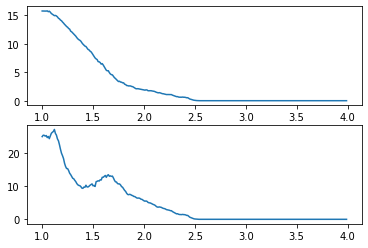

In [94]:
plt.subplot(211)
plt.plot(kappas, means)

plt.subplot(212)
plt.plot(kappas, vars)

In [95]:
mRs = minRank(errsDic, optKaIdx)
stat = statNums(numDic, mRs, optKaIdx)

Text(0.5, 0, 'num of changes')

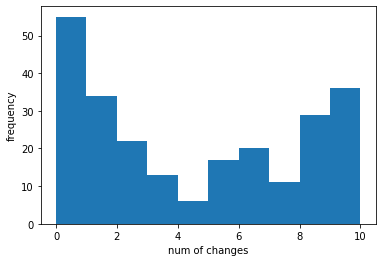

In [99]:
plt.hist(stat.numchgs)
plt.ylabel("frequency")
plt.xlabel("num of changes")

### Adjusting the rank adaptively

In [9]:
saveDir = resDir/"fMRIHPFs_rankAdap"
if not saveDir.exists():
    saveDir.mkdir()

    
#Lmin = 4
#lamb = 8e-5
#kappas = np.arange(1, 4, 0.01)
#
#numChgsAll = []
#DetObjs = []
#for ii in tqdm(range(243)):
#    Ymat = fMRIsHPF[ii]
#    DetRec = TVDNDetect(Ymat=Ymat, dataType="fMRI", MaxM=20, is_detrend=False,
#                      saveDir=None, showProgress=False, Lmin=Lmin, lamb=lamb, kappa=2, r=None)
#    DetRec()
#    DetRec.TuningKappa(kappas)
#    
#    DetObjs.append(DetRec)
#    numChgsAll.append(DetRec.numchgs)
#    
#numChgsArr = np.array(numChgsAll)
#meanChgs = numChgsArr.mean(axis=0)
#varChgs = numChgsArr.var(axis=0)
#subVarChgs = varChgs[np.logical_and(meanChgs<=10, meanChgs>=1)]
#subKappas = kappas[np.logical_and(meanChgs<=10, meanChgs>=1)]
#optKa = subKappas[np.argmin(subVarChgs)]
#
## Update det obj
#errs = []
#for DetObj in DetObjs:
#    DetObj.UpdateEcpts(DetObj.numchgs[kappas==optKa][0])
#    errs.append(DetObj.GetCurMSE())
#err = np.mean(errs)
#
#result = edict()
#result.DetObjs = DetObjs
#result.Err = err
#result.kappa = optKa
#
#with open(saveDir/"fMRIResultAdap.pkl", "wb") as f:
#    pickle.dump(result, f)
    
with open(saveDir/"fMRIResultAdapM8.pkl", "rb") as f:
    resultAdap = pickle.load(f)
    
optKa = resultAdap.kappa
DetObjs = resultAdap.DetObjs

Text(0.5, 0, 'Ranks')

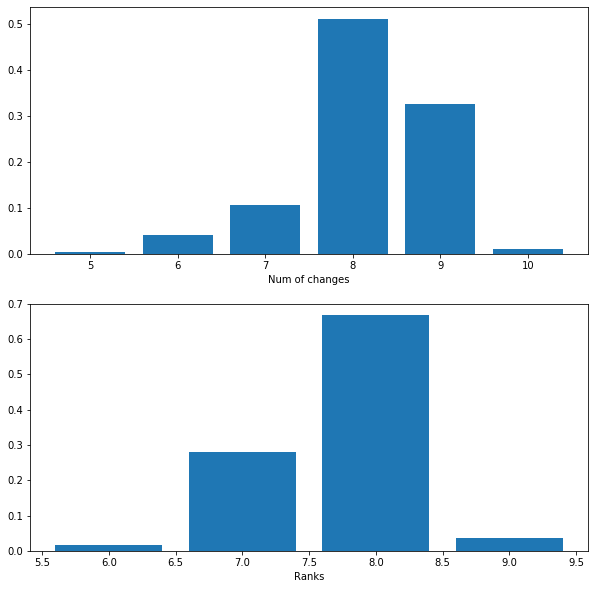

In [10]:
DetObjs = resultAdap.DetObjs
numchgs = []
nRanks = []
for DetObj in DetObjs:
    numchgs.append(len(DetObj.ecpts))
    nRanks.append(DetObj.paras.r)

numchgsCT = Counter(numchgs)
rankCT = Counter(nRanks)

keys = sorted(numchgsCT.keys())
ct = [numchgsCT[key] for key in keys]
rKeys = sorted(rankCT.keys())
rCt = [rankCT[key] for key in rKeys]

plt.figure(figsize=[10, 10])
plt.subplot(211)
plt.bar(keys, np.array(ct)/len(DetObjs))
plt.xlabel("Num of changes")

plt.subplot(212)
plt.bar(rKeys, np.array(rCt)/len(DetObjs))
plt.xlabel("Ranks")

### Try to find the demo

[ 95 229 237 119  49 153 143 131  82  24  73 128 152 219  83  25 126  99
 233  17 112  91 159 194  44  69 204 225  11  94  96 220 173   4 174 104
 234  61 105 142 205 187 190 144 155  21 116  76  60  70 207 232  43  48
 151  34  27  26  80 228 202 211 200 166   9 107  98 120  87 150  46 141
  18 201 231 157 217  92   3  93 203 197  15 124 122 227 214 139 239  50
 191 114 179 189 108  41 160 238  40  51 118  62  28  85 199 184  52  33
 212  30  10 135 148  53 215  59 109 132  63 222 213  23   1 193 223 186
 111  29  31   7 158 136 196 137  54 176  20 242 241 121 195 123 183  42
 177 182  19 125   0 163 101 164 224   6  66  58 149 103 226   2 162 154
 175  64 110  65  16 140 156  77 188 170 236 145  13 100 172 171  67 161
   5 240 198 117 127  57 167  81  71  84 168 102  78  14  86 130 210 134
  39 221 133 209 180  32 165  88  47 113 106 115 147  37 216  75  68 181
 178 185 208  56 138 230 206  38 235  74  12  55 129  79 169 146  97  90
  89  45  35   8  22 218  36 192  72]


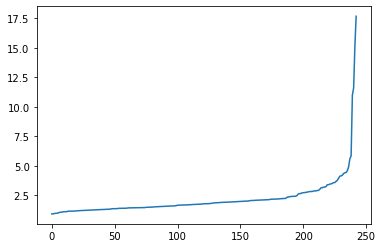

In [11]:
errs = []
for DetObj in DetObjs:
    errs.append(DetObj.GetCurMSE())
    
plt.plot(np.sort(errs))
argIdxs = np.argsort(errs)
print(argIdxs)

In [19]:
import pandas as pd
subArgIdxs = argIdxs[:50]
numFirst = [len(DetObjs[idx].ecpts) for idx in subArgIdxs]
dic = {"Idx":subArgIdxs, "num": numFirst}
pd.DataFrame(dic)

,Idx,num
0,95,9
1,229,8
2,237,9
3,119,9
4,49,9
5,153,8
6,143,9
7,131,8
8,82,8
9,24,8


In [20]:
[idx for idx in argIdxs if len(DetObjs[idx].ecpts) == 5 ]

[121]

+-------------+----------------------------+--------------------+------+
| Num of CPTs |       Estiamted CPTs       |        MSE         | Rank |
+-------------+----------------------------+--------------------+------+
|      5      | [ 26.  55.  80. 101. 131.] | 1.9058408243255849 |  9   |
+-------------+----------------------------+--------------------+------+


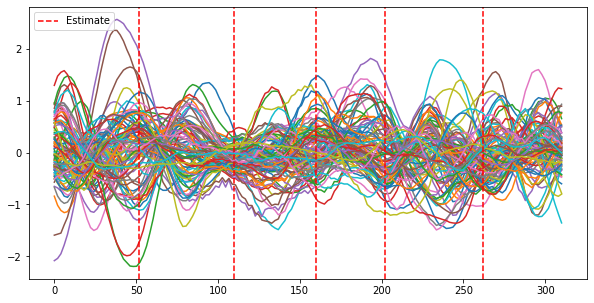

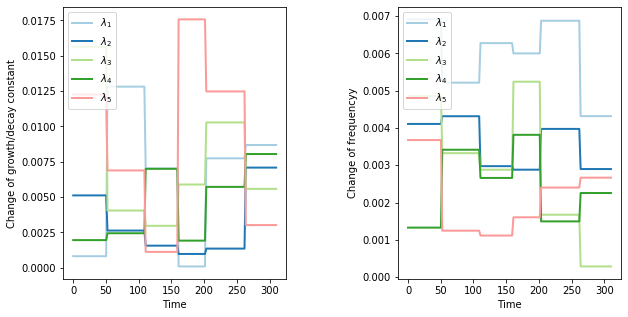

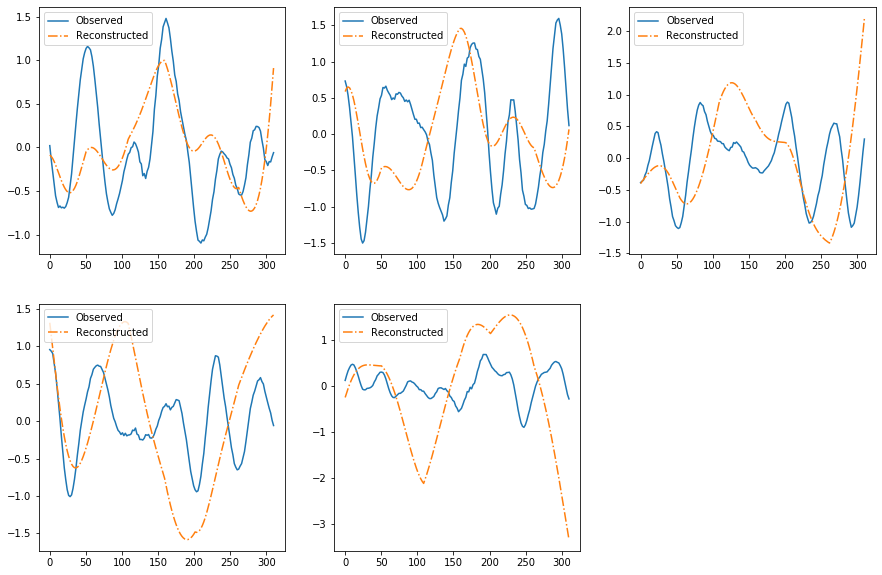

array([10, 26, 49, 13, 21])

In [44]:
from pyTVDN.tmpUtils import *
idx = 121
DetObj = DetObjs[idx]
print(DetObj)
DetObj.PlotEcpts()
DetObj.PlotEigenCurve()
DetObj.PlotRecCurve()

In [45]:
wU = obtainAbswU(DetObj)
tmpf = saveDir/f"fMRI{idx}wU.txt"
np.savetxt(tmpf, wU)

robj.r(f"filName <- paste0('{tmpf.__str__()}')")
robj.r(f"idx <- {idx+1}")
robj.r(f"prefixOut <- paste0('{saveDir.__str__()}', '/fMRIM8_')")
robj.r.source("../Rcode/saveNiiPy.R")

value,[RTYPES.NILSXP]
visible,[RTYPES.LGLSXP]
